<a href="https://colab.research.google.com/github/Bishnu7781/python/blob/main/Stock_Price_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 0.0183
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0010
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0010
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 9.9472e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 7.1486e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.3189e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.5788e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 8.2297e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.2721e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 6.4566e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.5421e-04
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 8.0688e-04
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 5.3069e-04
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.1929e-04
Epoch 15/50
49/49 ━━━━━━━━

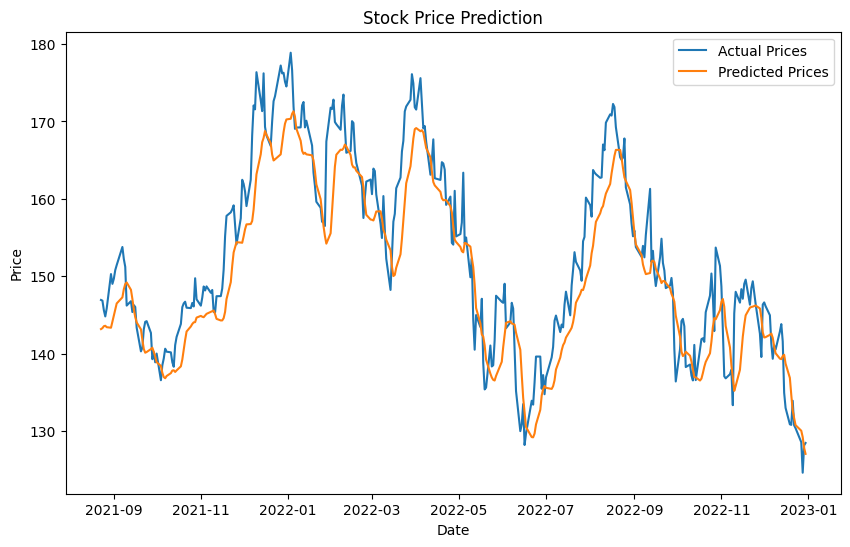

In [1]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Data Collection
ticker = "AAPL"  # Apple stock ticker
data = yf.download(ticker, start="2015-01-01", end="2022-12-31")
close_prices = data['Close'].values.reshape(-1, 1)

# Step 2: Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Step 3: Prepare Training and Testing Data
def create_dataset(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

x_train, y_train = create_dataset(train_data, sequence_length)
x_test, y_test = create_dataset(test_data, sequence_length)

# Reshape data for LSTM input
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile and Train the Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=50)

# Step 5: Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size+sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), label="Actual Prices")
plt.plot(data.index[train_size+sequence_length:], predictions, label="Predicted Prices")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()